## Assignment 6 Numpy

### 1. Write a function so that the columns of the output matrix are powers of the input vector. The order of the powers is determined by the increasing boolean argument. Specifically, when increasing is False, the i-th output column is the input vector raised element-wise to the power of N - i - 1.

In [1]:
import numpy as np
import pandas as pd
def Vandermonde(lst):
    Vandermonde=[]
    for num in lst:
        for j in range (len(lst)):
            Vandermonde.append(num**j)
    Val=np.array(Vandermonde)
    return Val.reshape(len(lst),len(lst))
Vandermonde([1,2,3,4,5])

array([[  1,   1,   1,   1,   1],
       [  1,   2,   4,   8,  16],
       [  1,   3,   9,  27,  81],
       [  1,   4,  16,  64, 256],
       [  1,   5,  25, 125, 625]])

In [21]:
a=int(input("Enter Start range of list="))
b=int(input("Enter Stop range of list="))
c=int(input("Enter Step size of list="))
inp=list(range(a,b,c))
n=(len(inp))
k=4
mas=n-k+1
for i in range(mas):
    y=0
    for j in range(k):
        y=y+inp[i+j]
    print("y",i+1,"=",y/k)

Enter Start range of list=0
Enter Stop range of list=10
Enter Step size of list=1
y 1 = 1.5
y 2 = 2.5
y 3 = 3.5
y 4 = 4.5
y 5 = 5.5
y 6 = 6.5
y 7 = 7.5


In [3]:
def moving_avg(arr,n):
    inr=len(arr)-n+1
    for i in range(inr):
        y=0
        for j in range(n):
            y=y+arr[i+j]
        print(y/n)
moving_avg([ 3, 5, 7, 2, 8, 10, 11, 65, 72, 81, 99, 100, 150],3)

5.0
4.666666666666667
5.666666666666667
6.666666666666667
9.666666666666666
28.666666666666668
49.333333333333336
72.66666666666667
84.0
93.33333333333333
116.33333333333333


## Assignment 7 Pandas

### 1.1) How-to-count-distance-to-the-previous-zero For each value, count the difference of the distance from the previous zero (or the start of the Series, whichever is closer) and if there are no previous zeros, print the position Consider a DataFrame df where there is an integer column {'X'[7, 2, 0, 3, 4, 2, 5, 0, 3, 4]} The values should therefore be [1, 2, 0, 1, 2, 3, 4, 0, 1, 2]. Make this a new column 'Y'. import pandas as pd df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

In [4]:
import pandas as pd
df=pd.DataFrame({'X':[7,2,0,3,4,2,5,0,3,4]})
x=[7,2,0,3,4,2,5,0,3,4]
y=[]
a=0
for i in x:
    if i!=0:
        y.append(a+1)
        a=a+1
    elif i==0:
        y.append(0)
        a=0
print(y)

[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]


In [5]:
df["y"]=y

In [6]:
df.head()

,X,y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2


 ### 1.2) Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers.

In [7]:
import pandas as pd
import numpy as np

def create_calendar(start='2015-1-1',end='2015-12-31'):
    random_numbers=np.random.randint(low=1,high=365,size=365)
    df=pd.DataFrame({"Date":pd.bdate_range(start,end)})
    lengthdf=len(df)
    df["random_index"]=np.random.randint(low=1,high=100,size=lengthdf)
    df["month"]=df.Date.dt.day
    df["day"]=df.Date.dt.weekday_name
    return df
create_calendar().head()

,Date,random_index,month,day
0,2015-01-01,78,1,Thursday
1,2015-01-02,46,2,Friday
2,2015-01-05,47,5,Monday
3,2015-01-06,49,6,Tuesday
4,2015-01-07,94,7,Wednesday


### 1.3) Find the sum of the values in s for every Wednesday

In [8]:
s=create_calendar()
wednes=np.where(s['day']=='Wednesday')
wednes_values=s.loc[wednes]
all_wednesday_random_sum=wednes_values["random_index"].sum()
all_wednesday_random_sum

2549

### 1.4) Average For each calendar month

In [9]:
s=create_calendar()
each_month=s.groupby(by=s["month"])
each_months_sum=each_month.random_index
monthly_average=each_months_sum.mean()
np.round(monthly_average,decimals=1).head

<bound method NDFrame.head of month
1     71.4
2     65.7
3     42.7
4     47.8
5     35.5
6     34.2
7     42.5
8     44.9
9     42.5
10    52.0
11    61.5
12    40.1
13    33.0
14    49.5
15    44.9
16    47.2
17    56.2
18    39.2
19    64.2
20    58.8
21    38.2
22    33.2
23    47.7
24    31.3
25    58.0
26    50.8
27    52.1
28    60.5
29    59.6
30    50.4
31    38.8
Name: random_index, dtype: float64>

### 1.5) For each group of four consecutive calendar months in s, find the date on which the highest value occurred.

In [10]:
s=create_calendar()
d=s.groupby(s["month"]%4).agg(['max','idxmax'])
d

Date        random_index        month       
             max idxmax          max idxmax   max idxmax
month                                                   
0     2015-12-28    257           98      7    28     19
1     2015-12-29    258           98    102    29     20
2     2015-12-30    259           99    108    30     21
3     2015-12-31    260           99     43    31     63

### =>Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv  

### Questions:

### 2.1) Delete unnamed columns

In [11]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv")

In [12]:
data.drop(["Unnamed: 0"], axis=1,inplace=True)
data.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


### 2.2) Show the distribution of male and female

In [13]:
data.head(5)
gender_distribution=data.groupby(by=data["Gender"])["Count"].count()
gender_distribution

Gender
F    558846
M    457549
Name: Count, dtype: int64

### 2.3) Show the top 5 most preferred names

In [14]:
data["Name"].value_counts().head(5)

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

### 2.4) What is the median name occurrence in the dataset

In [15]:
data.Name[data["Count"].median()]

'Elizabeth'

### 2.5) Distribution of male and female born count by states

In [16]:
born_count=data.groupby(['State','Gender'])['Count'].count()
born_count.head(12)

State  Gender
AK     F          2404
       M          2587
AL     F          9878
       M          8419
AR     F          7171
       M          6475
AZ     F         14518
       M         10820
CA     F         45144
       M         31637
CO     F         11424
       M          9183
Name: Count, dtype: int64

## Assignment 8 - Use Cases on Numpy and Pandas

### 1.) Write a Python program which accepts a list named : randomList = ['a', 0, 2]. Use exception handling using try-catch which gives the output as:

1) If the List element is a alphabet or string, the output will be <br>
The entry is a <br>
Oops! <class 'ValueError'> occured.<br>
Next entry.

2) If the List element is “0”,the output will be<br>
The entry is 0<br>
Oops! <class 'ZeroDivisionError'> occured.<br>
Next entry.


3) If the List element is and integer except 0,then output will be:<br>
The entry is 2<br>
The reciprocal of 2 is 0.5 // reciprocal of an integer<br>


In [17]:
randomlist=["a",0,2]
try:
    for i in randomlist:
        if str(i).isalpha()==True:
            print("The entry is "+i)
            print("Oops!<class'ValueError'> occured"+"\n"+"-"*50+"\n")

        elif int(i)==0:
            print("The entry is ",i)
            print("Oops!<class'Zero Division Error'> occured"+"\n"+"-"*50+"\n")
                        
        elif int(i)/2==True:
            print("The entry is ",i)
            print("Reciprocal of "+ str(i)+" is",1/i)
            break
        else:
            print("invalid")
finally:
    print("Next entry")

The entry is a
Oops!<class'ValueError'> occured
--------------------------------------------------

The entry is  0
Oops!<class'Zero Division Error'> occured
--------------------------------------------------

The entry is  2
Reciprocal of 2 is 0.5
Next entry


### 2) Array out of Bound Exception 
#### Write a Python program to give exception “Array Out of Bound” if the user wants to access the elements beyond the list size (use try and except) 

In [18]:
try:
    lst=[2,4,6]
    print(lst[3])
except :
    print("Array out of Bound.")

Array out of Bound.


### 3) Write a python module script that contains fib2() method to calculate the Fibonacci series till 1000 and save it as fibo.py.

In [19]:
# import os.path
# save_path ='C:\Users\Ajit\Anaconda3\Lib'
# def feb2():
#     nterms = int(1000)
#     n1, n2 = 0, 1
#     count = 0
#     if nterms <= 0:
#        print("Please enter a positive integer")
#     elif nterms == 1:
#        print("Fibonacci sequence upto",nterms,":")
#        print(n1)
#     else:
#        print("Fibonacci sequence:")
#        while count < nterms:
#            print(n1)
#            nth = n1 + n2
#            # update values
#            n1 = n2
#            n2 = nth
#            count += 1
# feb2()

In [20]:
import fibo
print(feb2)

Fibonacci sequence:
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229
832040
1346269
2178309
3524578
5702887
9227465
14930352
24157817
39088169
63245986
102334155
165580141
267914296
433494437
701408733
1134903170
1836311903
2971215073
4807526976
7778742049
12586269025
20365011074
32951280099
53316291173
86267571272
139583862445
225851433717
365435296162
591286729879
956722026041
1548008755920
2504730781961
4052739537881
6557470319842
10610209857723
17167680177565
27777890035288
44945570212853
72723460248141
117669030460994
190392490709135
308061521170129
498454011879264
806515533049393
1304969544928657
2111485077978050
3416454622906707
5527939700884757
8944394323791464
14472334024676221
23416728348467685
37889062373143906
61305790721611591
99194853094755497
160500643816367088
259695496911122585
420196140727489673
679891637638612258
1100087778366101931
1779979416004714189
2880067194370816120
466004661037553030

NameError: name 'feb2' is not defined

### 4) Write a python module script that contains ispalindrome() method to calculate the input string as palindrome string or not and save it as palindrome.py.

In [ ]:
# def ispalindrome(a):
#     if a[::-1]==a:
#         return("Strings is polindrome")
#     else:
#         return("Strings is not palindrome")

In [ ]:
import palindrome
print(palindrome.ispalindrome("racecar"))


### 5) Write a program in Python with one class called Cipher. Within the constructor of this class, ask user for a string and store it. Use a static variable, key to store a randomly generated integer between 1 and 50 inclusive. Implement two methods, encrypt and decrypt within this class. Encrypt generates and prints a cipher text using the user-entered string and the key and ecrypt generates decrypted string from ciphertext. The cipher only encrypts alpha and numeric (A-Z, a-z, 0-9). All Symbols, such as - , ; %, remain unencrypted. The cipher text can have special characters. Use generator expression to filter out alpha and numeric characters of the input string and to generate cipher text. Create an instance of this class, encrypt and decrypt back the user entered string.

In [ ]:
import numpy as np
class Cypher:
    def__init__(self,text):
        print("Original Text: "+str(text))
        self.text=text
        self.key=np.randint(low=1,high=5,size=len(text))
        self.encrypted_text=""
        self.decrypted_text=""
    def generate_cypher(self,string):
        for char in string: 
            if char.isalnum():
                yield char
            else:
                yield None

### 6) Get Data from the following link:

http://files.grouplens.org/datasets/movielens/ml-20m.zip

We will be using the following files for this exercise:<br>
ratings.csv : userId,movieId,rating, timestamp<br>
tags.csv : userId,movieId, tag, timestamp<br>
movies.csv : movieId, title, genres

#### I. Read the dataset using pandas.

In [33]:
import pandas as pd
import os
os.chdir("C:/Users/Aman Raj/Desktop/data science acadgild/Assignment/ml-20m")
os.getcwd()
ratings=pd.read_csv("ratings.csv")
tags=pd.read_csv("tags.csv")
movies=pd.read_csv("movies.csv")

#### II. Extract the first row from tags and print its type.

In [7]:
print(tags.dtypes)
tags.head(1)

userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object


,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180


#### III. Extract row 0, 11, 2000 from tags DataFrame.

In [8]:
tags.iloc[[0,11,2000]]

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
11,65,1783,noir thriller,1368149983
2000,910,68554,conspiracy theory,1368043943


#### IV. Print index, columns of the DataFrame.


In [9]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


#### V. Calculate descriptive statistics for the 'ratings' column of the ratings DataFrame. Verify using describe().


In [10]:
ratings["rating"].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

#### VI. Filter out ratings with rating > 5

In [11]:
condition=ratings["rating"]>5
ratings[condition]

,userId,movieId,rating,timestamp


#### VII. Find how many null values, missing values are present. Deal with them. Print out how many rows have been modified.

In [12]:
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [13]:
tags["tag"].mode()

0    sci-fi
dtype: object

In [14]:
def mode_func(x):
    return(x.value_counts().argmax())
tags["tag"].fillna(mode_func(tags["tag"]),inplace=True)
tags.isnull().sum()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

#### VIII. Filter out movies from the movies DataFrame that are of type 'Animation'.


In [32]:

movies[movies.genres == "Animation"].head()

,movieId,title,genres
2503,2588,Cloudland (1998),Animation
4906,5002,Fritz the Cat (1972),Animation
4907,5003,"Nine Lives of Fritz the Cat, The (1974)",Animation
9455,27738,"Cathedral, The (Katedra) (2002)",Animation
9989,32840,Vincent (1982),Animation


#### IX. Find the average rating of movies.

In [33]:
ratings['rating'].mean()

3.5255285642993797

#### X. Perform an inner join of movies and tags based on movieId.

In [34]:
pd.merge(movies, tags, on=['movieId','movieId'], how='inner').head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


#### XI. Print out the 5 movies that belong to the Comedy genre and have rating greater than 4.


In [35]:
# Comedy = movies[movies.genres == "Comedy"]
a=pd.merge(movies, ratings, on=['movieId','movieId'] ,how='inner')
above=a[(a['genres']=='Comedy')&(a['rating']>4)]
above.head()

,movieId,title,genres,userId,rating,timestamp
87435,5,Father of the Bride Part II (1995),Comedy,117,5.0,861553146
87437,5,Father of the Bride Part II (1995),Comedy,127,5.0,847127740
87455,5,Father of the Bride Part II (1995),Comedy,350,5.0,1360209812
87460,5,Father of the Bride Part II (1995),Comedy,390,5.0,836139583
87462,5,Father of the Bride Part II (1995),Comedy,401,5.0,847049988


#### XII. Split 'genres' into multiple columns.

In [36]:
split=pd.DataFrame(movies.genres.str.split("|").tolist(),columns=["genres-1","genres-2","genres-3","genres-4","genres-5","genres-6","genres-7","genres-8","genres-9","genres-10"])
split.head()

,genres-1,genres-2,genres-3,genres-4,genres-5,genres-6,genres-7,genres-8,genres-9,genres-10
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


#### XIII. Extract year from title e.g. (1995).

In [37]:
movies['title'].str.extract('(?P<Year>\d+)').head()

,Year
0,1995
1,1995
2,1995
3,1995
4,1995


#### XIV. Select rows based on timestamps later than 2015-02-01.

In [38]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


#### XV. Sort the tags DataFrame based on timestamp.

In [35]:
tags.sort_values(["timestamp"],axis=0,ascending=True).head()

,userId,movieId,tag,timestamp
333932,100371,2788,monty python,1135429210
333927,100371,1732,coen brothers,1135429236
333924,100371,1206,stanley kubrick,1135429248
333923,100371,1193,jack nicholson,1135429371
333939,100371,5004,peter sellers,1135429399


### Assignment 9 - Problem Statement: Matplotlib

### Matplotlib: <br> This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv<br>
titanic = pd.read_csv(url)


In [39]:
titanic=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

#### 1. Create a pie chart presenting the male/female proportion

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
male=titanic.loc[titanic.sex=="male"]
nmale=len(male)
print(nmale)
female=titanic.loc[titanic.sex=="female"]
nfemale=len(female)
print(nfemale)

843
466


In [41]:
per_male=nmale/(nmale+nfemale)*100
per_female=nfemale/(nmale+nfemale)*100
print(per_male)
print(per_female)

64.40030557677616
35.59969442322384


([<matplotlib.patches.Wedge at 0x1908a10f4e0>,
 [Text(-0.764967886879411, 1.5739517565806296, 'Male Propertion'),
  Text(0.7212555751437824, -1.48401158867578, 'Female Propertion')],
 [Text(-0.4371245067882348, 0.8994010037603595, '64.40%'),
  Text(0.3934121318966085, -0.8094608665504253, '35.60%')])

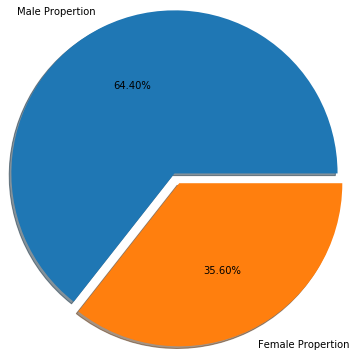

In [42]:
male_vs_female=[per_male,per_female]
male_vs_female_lbls=["Male Propertion","Female Propertion"]
plt.figure(figsize=(15,5))
plt.pie(male_vs_female,labels=male_vs_female_lbls,shadow=True, autopct="%1.2f%%",radius=1.5,explode=[.1,0])

### 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

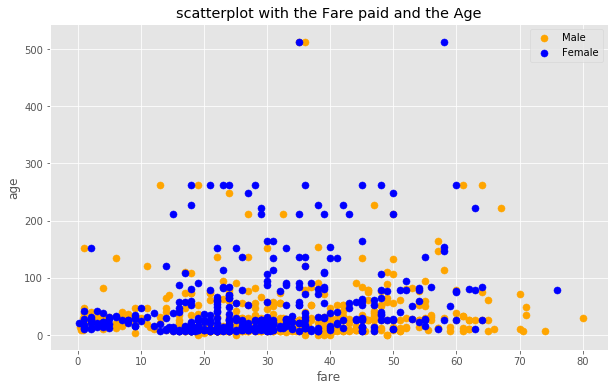

In [43]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
axis=plt.subplot()
axis.scatter(titanic[titanic.sex=="male"]['age'],titanic[titanic.sex=='male']['fare'],c="orange",s=50)
axis.scatter(titanic[titanic.sex=="female"]['age'],titanic[titanic.sex=='female']['fare'],c="blue",s=50)
axis.set_title("scatterplot with the Fare paid and the Age")
axis.set_xlabel("fare")
axis.set_ylabel("age")
axis.legend(('Male','Female'))

## Assignment 10- Problem Statement: Data Cleaning

#### It happens all the time: someone gives you data containing malformed strings, Python, lists
and missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )',
'12. Air France', '"Swiss Air"']})


#### 1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column)

In [83]:
import numpy as np
import pandas as pd
flight=pd.DataFrame({'From_To':['LoNDon_paris','MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis','Brussels_londOn'],
'FlightNumber':[10045, np.nan, 10065, np.nan, 10085],
'RecentDelays':[[23,47],[],[24,43,87],[13],[67,32]],
'Airline':['KLM(!)','(12)','(British Airways.)','12. Air France','"Swiss Air"']})

In [84]:
flight['FlightNumber'] = flight['FlightNumber'].interpolate().astype(int)

flight['FlightNumber']


0    10045
1    10055
2    10065
3    10075
4    10085
Name: FlightNumber, dtype: int32

#### 2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.


In [85]:
temp = flight["From_To"].str.split('_', expand=True)
temp.columns = ['From', 'To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


#### 3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [87]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


#### 4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [88]:
flight=flight.drop(["From_To"], axis=1,)
flight=flight.join(temp, how='outer')
flight


,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],(12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways.),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


#### 5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.


In [89]:
delays = flight['RecentDelays'].apply(pd.Series)

delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]

flight = flight.drop('RecentDelays', axis=1).join(delays)

flight

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM(!),London,Paris,23.0,47.0,NaN
1,10055,(12),Madrid,Milan,NaN,NaN,NaN
2,10065,(British Airways.),London,Stockholm,24.0,43.0,87.0
3,10075,12. Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,"""Swiss Air""",Brussels,London,67.0,32.0,NaN


## Assignment 11 Pandas SQL

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import sqlite3 as db
from pandasql import sqldf

In [3]:
pysqldf = lambda q: sqldf(q, globals())

In [4]:
Sqldb_adult=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")


## 1. Select 10 records from the adult sqladb

In [5]:
pysqldf("SELECT * FROM Sqldb_adult LIMIT 10")

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [6]:
Sqldb_adult.columns=["Age","Workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country",">50K<=50K"]

### Task: Create a sql db from adult dataset and name it sqladb <br>

1.Select 10 records from the adult sqladb

In [7]:
pysqldf("""Select * from Sqldb_adult limit 10""")

,Age,Workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,>50K<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### 2.Show me the average hours per week of all men who are working in private sector

In [8]:
pysqldf("select age,sex,Workclass from Sqldb_adult where sex='male' and Workclass='Private' ")

,Age,sex,Workclass


In [9]:
pysqldf("select age,sex,Workclass from Sqldb_adult where sex='male' and Workclass='Private' ")

,Age,sex,Workclass


### 3. Show me the frequency table for education, occupation and relationship, separately

In [10]:
pysqldf("select education, count(education) as Frequency from Sqldb_adult group by education order by count(education) ")

,education,Frequency
0,Preschool,51
1,1st-4th,168
2,5th-6th,333
3,Doctorate,413
4,12th,433
5,9th,514
6,Prof-school,576
7,7th-8th,646
8,10th,933
9,Assoc-acdm,1067


In [11]:
pysqldf("select occupation, count(occupation) as Frequency from Sqldb_adult group by occupation order by count(occupation) ")

,occupation,Frequency
0,Armed-Forces,9
1,Priv-house-serv,149
2,Protective-serv,649
3,Tech-support,928
4,Farming-fishing,994
5,Handlers-cleaners,1370
6,Transport-moving,1597
7,?,1843
8,Machine-op-inspct,2002
9,Other-service,3295


In [12]:
pysqldf("select relationship, count(relationship) as Frequency from Sqldb_adult group by relationship order by count(relationship) ")

,relationship,Frequency
0,Other-relative,981
1,Wife,1568
2,Unmarried,3446
3,Own-child,5068
4,Not-in-family,8304
5,Husband,13193


### 4. Are there any people who are married, working in private sector and having a master’s degree

In [13]:
pysqldf("""select Age,Workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex
           from Sqldb_adult 
           where  Workclass='Private' 
           and education='Masters' 
           and marital_status='Married-civ-spouse';""")

,Age,Workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex


In [14]:
pysqldf("""select workclass, avg(age) as Average,min(age) as Minimum,max(age) as Maximum
           from Sqldb_adult
           group by workclass;
            """)

,Workclass,Average,Minimum,Maximum
0,?,40.960240,17,90
1,Federal-gov,42.590625,17,90
2,Local-gov,41.751075,17,90
3,Never-worked,20.571429,17,30
4,Private,36.797585,17,90
5,Self-emp-inc,46.017025,17,84
6,Self-emp-not-inc,44.969697,17,90
7,State-gov,39.436392,17,81
8,Without-pay,47.785714,19,72


### 6.Calculate age distribution by country

In [15]:
pysqldf(""" select native_country,age,count(age) as distribution
             from Sqldb_adult
             group by native_country
             limit 10
               """)

,native_country,Age,distribution
0,?,40,583
1,Cambodia,42,19
2,Canada,56,121
3,China,51,75
4,Columbia,75,59
5,Cuba,28,95
6,Dominican-Republic,23,70
7,Ecuador,50,28
8,El-Salvador,23,106
9,England,48,90


### 7.Compute a new column as 'Net-Capital-Gain' from the two columns 'capitalgain' and 'capitalloss'

In [16]:
pysqldf(""" select capital_gain,capital_loss,(capital_gain+capital_loss) as Net_Capital_Gain
            from Sqldb_adult
            limit 10
          """)

,capital_gain,capital_loss,Net_Capital_Gain
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,14084,0,14084
8,5178,0,5178
9,0,0,0


## Problem Statement 2
### Problem statement 2:
### Read the following data set:
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

In [17]:
sqldb_adult2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

In [18]:
sqldb_adult2.columns = ['Age','Workclass','fnlwgt','education','educationnum','maritalstatus','Occupation','Relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','>50K<=50K']

In [19]:
sqldb_adult2.head(5)

,Age,Workclass,fnlwgt,education,educationnum,maritalstatus,Occupation,Relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,>50K<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [20]:
import sqlalchemy
sqlalchemy.__version__

'1.3.5'

In [21]:
from sqlalchemy import create_engine

### Task:
### 1.Create an sqlalchemy engine using a sample from the data set

In [22]:
# To start interacting with the database we first we need to establish a connection.
engine = create_engine('sqlite:///myFirstdb1', echo=True)


In [23]:
from sqlalchemy.ext.declarative import declarative_base

In [24]:
Base = declarative_base()
from sqlalchemy import Column, Integer, String

In [25]:
sqldb_adult2.to_sql('myFirstdb1', engine)

2019-12-04 14:46:47,461 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-12-04 14:46:47,465 INFO sqlalchemy.engine.base.Engine ()
2019-12-04 14:46:47,467 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-12-04 14:46:47,469 INFO sqlalchemy.engine.base.Engine ()
2019-12-04 14:46:47,470 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("myFirstdb1")
2019-12-04 14:46:47,472 INFO sqlalchemy.engine.base.Engine ()
2019-12-04 14:46:47,477 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "myFirstdb1" (
	"index" BIGINT, 
	"Age" BIGINT, 
	"Workclass" TEXT, 
	fnlwgt BIGINT, 
	education TEXT, 
	educationnum BIGINT, 
	maritalstatus TEXT, 
	"Occupation" TEXT, 
	"Relationship" TEXT, 
	race TEXT, 
	sex TEXT, 
	capitalgain BIGINT, 
	capitalloss BIGINT, 
	hoursperweek BIGINT, 
	nativecountry TEXT, 
	">50K<=50K" TEXT
)


2019-12-04 14:46:47,478 INFO sqlalchemy.engine.base.Engine ()
2019-12-04 14:46:47,5

### 1.Write two basic update queries


In [26]:
engine.execute('''UPDATE myFirstdb1 SET education = 'non-Grad' WHERE educationnum <= 9''')
engine.execute('''UPDATE myFirstdb1 SET Relationship = 'Single' WHERE maritalstatus == ' Divorced' ''')

print(engine.execute('''SELECT * FROM myFirstdb1 WHERE education = 'non-Grad' and Age<=39''').fetchall())
print(engine.execute('''SELECT * FROM myFirstdb1 WHERE maritalstatus = 'Divorced' and Age<=39''').fetchall())


2019-12-04 14:48:22,035 INFO sqlalchemy.engine.base.Engine UPDATE myFirstdb1 SET education = 'non-Grad' WHERE educationnum <= 9
2019-12-04 14:48:22,036 INFO sqlalchemy.engine.base.Engine ()
2019-12-04 14:48:22,682 INFO sqlalchemy.engine.base.Engine COMMIT
2019-12-04 14:48:23,325 INFO sqlalchemy.engine.base.Engine UPDATE myFirstdb1 SET Relationship = 'Single' WHERE maritalstatus == ' Divorced' 
2019-12-04 14:48:23,327 INFO sqlalchemy.engine.base.Engine ()
2019-12-04 14:48:23,855 INFO sqlalchemy.engine.base.Engine COMMIT
2019-12-04 14:48:24,422 INFO sqlalchemy.engine.base.Engine SELECT * FROM myFirstdb1 WHERE education = 'non-Grad' and Age<=39
2019-12-04 14:48:24,424 INFO sqlalchemy.engine.base.Engine ()
[(1, 38, ' Private', 215646, 'non-Grad', 9, ' Divorced', ' Handlers-cleaners', 'Single', ' White', ' Male', 0, 0, 40, ' United-States', ' <=50K'), (14, 34, ' Private', 245487, 'non-Grad', 4, ' Married-civ-spouse', ' Transport-moving', ' Husband', ' Amer-Indian-Eskimo', ' Male', 0, 0, 45,

2019-12-04 14:48:24,682 INFO sqlalchemy.engine.base.Engine ()
[]


### 3.Write two delete queries


In [27]:
engine.execute("DELETE FROM myFirstdb1 WHERE Age<=39")
engine.execute("DELETE FROM myFirstdb1 WHERE maritalstatus = ' Never-married'")

2019-12-04 14:50:02,402 INFO sqlalchemy.engine.base.Engine DELETE FROM myFirstdb1 WHERE Age<=39
2019-12-04 14:50:02,404 INFO sqlalchemy.engine.base.Engine ()
2019-12-04 14:50:02,974 INFO sqlalchemy.engine.base.Engine COMMIT
2019-12-04 14:50:03,732 INFO sqlalchemy.engine.base.Engine DELETE FROM myFirstdb1 WHERE maritalstatus = ' Never-married'
2019-12-04 14:50:03,734 INFO sqlalchemy.engine.base.Engine ()
2019-12-04 14:50:04,079 INFO sqlalchemy.engine.base.Engine COMMIT


In [28]:
print(engine.execute('''SELECT * FROM myFirstdb1 WHERE Age<=39''').fetchall())
print(engine.execute('''SELECT * FROM myFirstdb1 WHERE maritalstatus = ' Never-married' ''').fetchall())

2019-12-04 14:50:20,779 INFO sqlalchemy.engine.base.Engine SELECT * FROM myFirstdb1 WHERE Age<=39
2019-12-04 14:50:20,780 INFO sqlalchemy.engine.base.Engine ()
[]
2019-12-04 14:50:20,797 INFO sqlalchemy.engine.base.Engine SELECT * FROM myFirstdb1 WHERE maritalstatus = ' Never-married' 
2019-12-04 14:50:20,799 INFO sqlalchemy.engine.base.Engine ()
[]


### 4.Write two filter queries

In [29]:
print( engine.execute(" SELECT Age, educationnum, workclass FROM myFirstdb1 WHERE capitalgain = {capitalgain}".format(capitalgain= 14084)).fetchall())

print( engine.execute(" SELECT Age, educationnum, workclass FROM myFirstdb1 WHERE hoursperweek = {hoursperweek}".format(hoursperweek= 13)).fetchall())

2019-12-04 14:50:57,512 INFO sqlalchemy.engine.base.Engine  SELECT Age, educationnum, workclass FROM myFirstdb1 WHERE capitalgain = 14084
2019-12-04 14:50:57,514 INFO sqlalchemy.engine.base.Engine ()
[(55, 13, ' Private'), (52, 10, ' Private'), (51, 13, ' Private'), (58, 13, ' Private'), (48, 15, ' Self-emp-not-inc'), (59, 10, ' Private'), (49, 10, ' Private'), (55, 14, ' Private'), (53, 16, ' Self-emp-inc'), (40, 13, ' Private'), (48, 12, ' ?'), (49, 9, ' Self-emp-not-inc'), (47, 9, ' Private'), (62, 13, ' State-gov'), (51, 9, ' Self-emp-inc'), (63, 10, ' Self-emp-inc'), (58, 7, ' Federal-gov')]
2019-12-04 14:50:57,529 INFO sqlalchemy.engine.base.Engine  SELECT Age, educationnum, workclass FROM myFirstdb1 WHERE hoursperweek = 13
2019-12-04 14:50:57,531 INFO sqlalchemy.engine.base.Engine ()
[(50, 13, ' Self-emp-not-inc'), (76, 5, ' Private'), (57, 13, ' Self-emp-not-inc'), (84, 9, ' Private'), (71, 5, ' Private'), (66, 9, ' Private'), (76, 9, ' Local-gov'), (48, 15, ' Private'), (75, 1

### 5.Write two function queriesm

In [30]:
def fact(n):
    fa = 1
    for _n in range(n+1):
        if _n>0:
            #fa.append(_n)
            fa = fa*_n
    return fa

In [31]:
engine = create_engine('sqlite:///fact', echo=True)

In [32]:
engine.execute('CREATE TABLE IF NOT EXISTS fact (value INTEGER)')
engine.execute('INSERT INTO fact VALUES (?)', [(str(t),) for t in range(fact(3))])
print(engine.execute("SELECT * FROM fact").fetchall())

2019-12-04 14:52:16,576 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-12-04 14:52:16,578 INFO sqlalchemy.engine.base.Engine ()
2019-12-04 14:52:16,580 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-12-04 14:52:16,582 INFO sqlalchemy.engine.base.Engine ()
2019-12-04 14:52:16,583 INFO sqlalchemy.engine.base.Engine CREATE TABLE IF NOT EXISTS fact (value INTEGER)
2019-12-04 14:52:16,584 INFO sqlalchemy.engine.base.Engine ()
2019-12-04 14:52:16,735 INFO sqlalchemy.engine.base.Engine COMMIT
2019-12-04 14:52:16,762 INFO sqlalchemy.engine.base.Engine INSERT INTO fact VALUES (?)
2019-12-04 14:52:16,765 INFO sqlalchemy.engine.base.Engine [('0',), ('1',), ('2',), ('3',), ('4',), ('5',)]
2019-12-04 14:52:16,770 INFO sqlalchemy.engine.base.Engine COMMIT
2019-12-04 14:52:16,897 INFO sqlalchemy.engine.base.Engine SELECT * FROM fact
2019-12-04 14:52:16,899 INFO sqlalchemy.engine.base.Engine ()
[(